<a href="https://colab.research.google.com/github/aliahalotaibi73/week3_Day3_exercises/blob/main/PCA_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PCA**







#Step 1 : import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

#Step 2: Importing the data set

###Import the dataset and distributing the dataset into X and y components for data analysis.




In [5]:
# instantiating
#wine = load_wine(as_frame=True)
# creating dataframe
#df = wine.frame

wine = load_wine()
X = wine.data
y = wine.target



In [6]:
df = pd.DataFrame(data=X, columns=wine.feature_names)
df['target'] = y

In [7]:
df.shape

(178, 14)

In [ ]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [ ]:
df.duplicated().sum()

0

#Step 3 : Step 3: Splitting the dataset into the Training set and Test set





In [8]:
X_train , X_test , y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [9]:
X_train_mean = X.mean() # ممكن قبل لا نسوي سبلت اسوي السكالينق
X_train_std = X.std()
X_train_scaled = (X_train - X_train_mean) / X_train_std

#Step 4: Feature Scaling
###Doing the pre-processing part on training and testing set such as fitting the Standard scale.






In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Step 5: Applying PCA function
###Applying the PCA function into the training and testing set for analysis.




In [13]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#Step 6: Fitting Logistic Regression To the training set




In [14]:
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)


LogisticRegression()

#Step 7: Predicting the test set result




In [16]:
y_pred = lr.predict(X_test_pca)

#Step 8: Making the confusion matrix




In [17]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]


#Step 9: Predicting the training set result




In [19]:
y_train_pred = lr.predict(X_train_pca)

#Step 10: Visualizing the Test set results




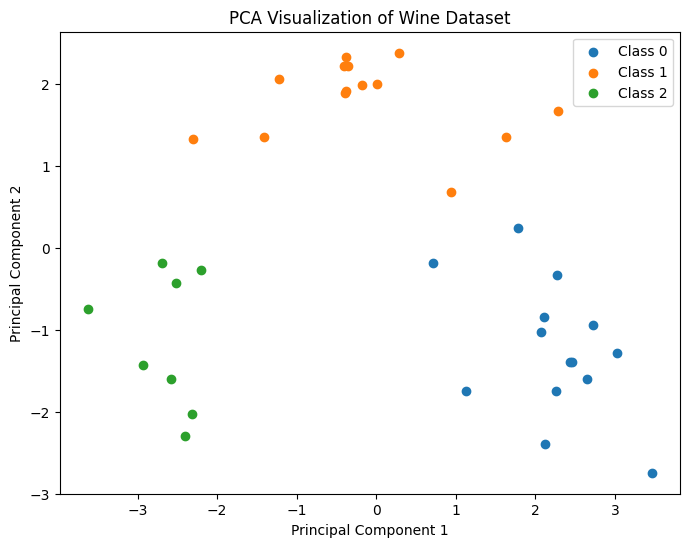

In [20]:
plt.figure(figsize=(8, 6))
for i in range(len(np.unique(y_test))):
    plt.scatter(X_test_pca[y_test == i, 0], X_test_pca[y_test == i, 1], label=f'Class {i}')
plt.title('PCA Visualization of Wine Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

#**Well Done :)**
Now let's practice!